In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('../65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df = df.drop(labels=["No","YEAR","Month","ALT","Period"], axis=1)
df.head()

,Station_Names,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE
0,Barisal,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36
1,Barisal,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36
2,Barisal,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36
3,Barisal,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36
4,Barisal,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36


In [3]:
X= df.iloc[:,[1,2,3,4,6,7,8,9,10,11,12]]
y= df.iloc[:,5]

In [4]:
X.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE
0,29.4,12.3,0.0,68.0,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36
1,30.0,14.1,0.0,77.0,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36
2,28.2,12.3,0.0,77.0,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36
3,26.6,12.3,2.0,77.0,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36
4,30.0,13.3,10.0,75.0,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36


In [10]:
### xgboost

In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [7]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[23:21:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [8]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.911185


In [9]:
data_dmatrix = xgb.DMatrix(data=X,label=y)


params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:21:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:21:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[23:21:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [10]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.301430,0.008815,1.301743,0.018714
1,1.231664,0.007780,1.232668,0.020490
2,1.172901,0.009302,1.174752,0.018318
3,1.118904,0.008603,1.121048,0.019111
4,1.073702,0.007700,1.076434,0.020343


In [11]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.755556
Name: test-rmse-mean, dtype: float64


In [12]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[23:21:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


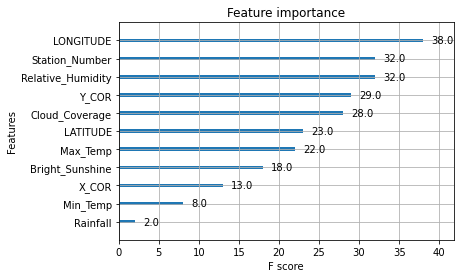

In [13]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [11]:
### anova correlation coefficient feature selection

<AxesSubplot:title={'center':'Cloud_Coverage'}, xlabel='Station_Names'>

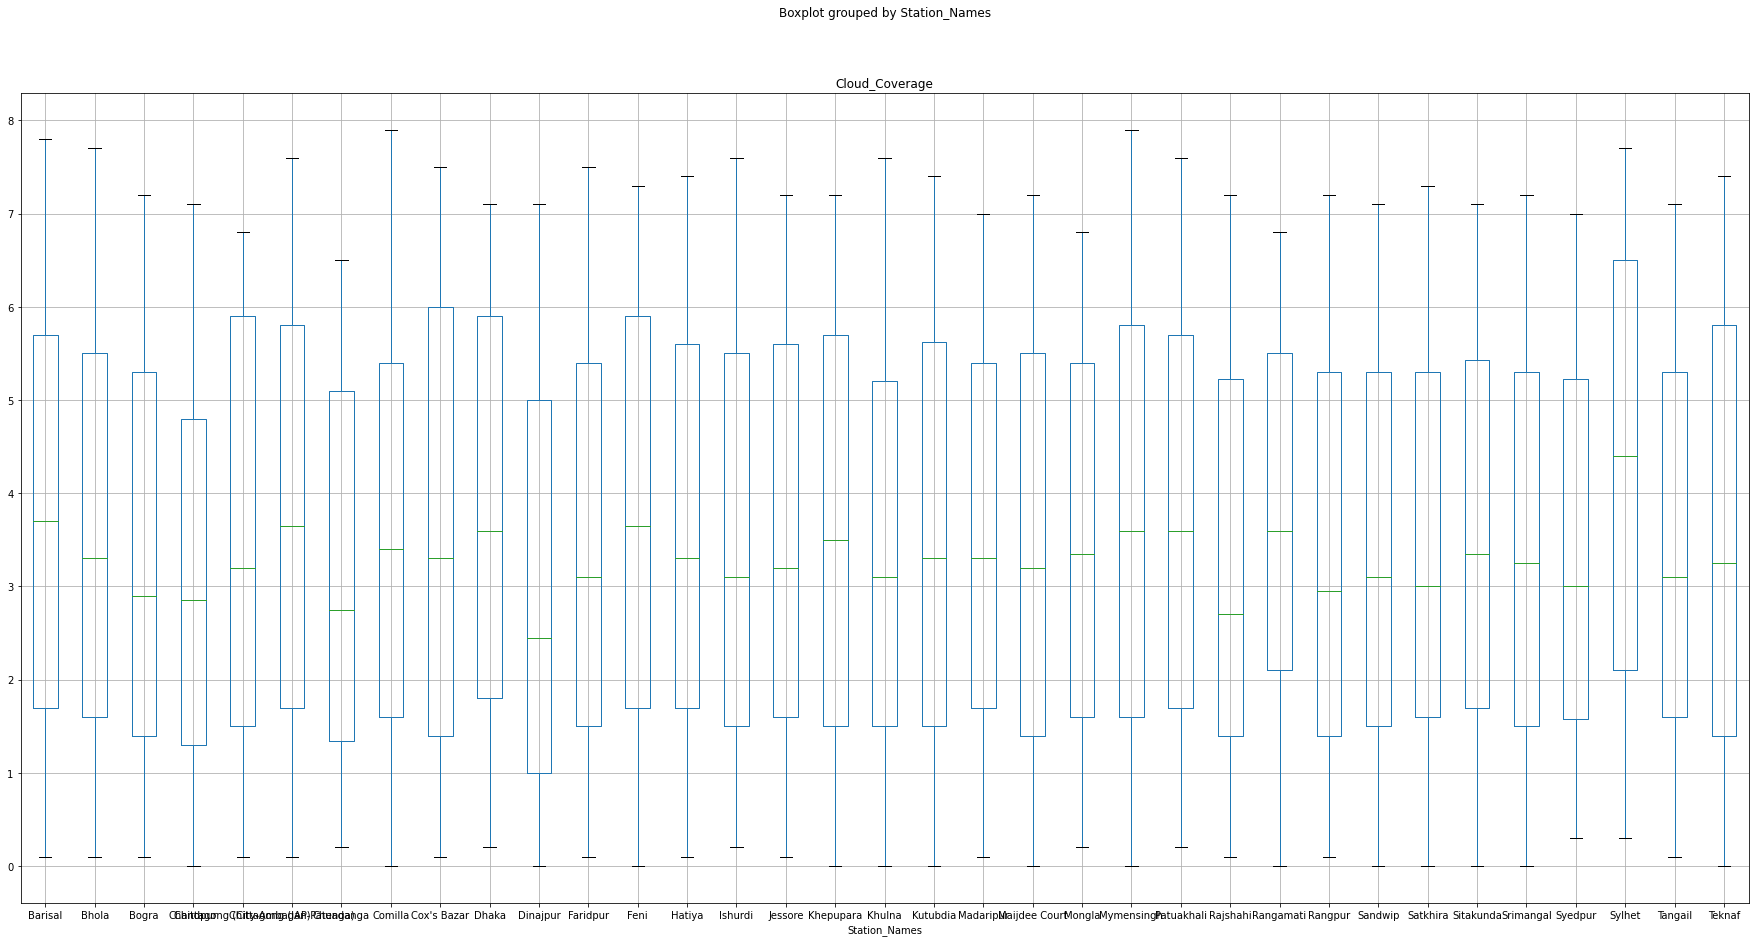

In [16]:
df.boxplot('Cloud_Coverage', by='Station_Names',figsize=(30,15))

In [28]:
 display(df.pivot(columns='YEAR', index='No'))

Station_Names                                                         \
YEAR           1948     1949     1950     1951     1952     1953 1954 1955   
No                                                                           
0               NaN  Barisal      NaN      NaN      NaN      NaN  NaN  NaN   
1               NaN      NaN  Barisal      NaN      NaN      NaN  NaN  NaN   
2               NaN      NaN      NaN  Barisal      NaN      NaN  NaN  NaN   
3               NaN      NaN      NaN      NaN  Barisal      NaN  NaN  NaN   
4               NaN      NaN      NaN      NaN      NaN  Barisal  NaN  NaN   
...             ...      ...      ...      ...      ...      ...  ...  ...   
21115           NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN   
21116           NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN   
21117           NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN   
21118           NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN   
21119           NaN      NaN      NaN      NaN      NaN      NaN  NaN  NaN   

                 ... Period                                                 \
YEAR  1956 1957  ...   2004 2005 2006 2007 2008     2009     2010     2011   
No               ...                                                         
0      NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN      NaN      NaN      NaN   
1      NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN      NaN      NaN      NaN   
2      NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN      NaN      NaN      NaN   
3      NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN      NaN      NaN      NaN   
4      NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN      NaN      NaN      NaN   
...    ...  ...  ...    ...  ...  ...  ...  ...      ...      ...      ...   
21115  NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN  2009.12      NaN      NaN   
21116  NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN      NaN  2010.12      NaN   
21117  NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN      NaN      NaN  2011.12   
21118  NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN      NaN      NaN      NaN   
21119  NaN  NaN  ...    NaN  NaN  NaN  NaN  NaN      NaN      NaN      NaN   

                         
YEAR      2012     2013  
No                       
0          NaN      NaN  
1          NaN      NaN  
2          NaN      NaN  
3          NaN      NaN  
4          NaN      NaN  
...        ...      ...  
21115      NaN      NaN  
21116      NaN      NaN  
21117      NaN      NaN  
21118  2012.12      NaN  
21119      NaN  2013.12  

[21120 rows x 1056 columns]